In [1]:
import os 

module_directory = os.path.dirname(os.getcwd())
# define function to find all the files of a given extension in a directory and its subfolders, 
# and return the filename if check_print is True 
def findext(extension, path, check_print): 
    l = [] 
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith(extension):
                if filename.rsplit('.')[0].rsplit('-')[1] == 'EL' : 
                    l.append(os.path.join(root,filename))
                    if check_print == True : 
                        print(os.path.splitext(filename)[0])
    return(l)

# first, let's find all the csv files to convert: 
list_csv = findext('csv',module_directory,1) 

id000006-EL
id000008-EL
id000004-EL
id000010-EL
id000002-EL
id000007-EL
id000009-EL
id000005-EL
id000003-EL


id000006  done
id000008  done
id000004  done
id000010  done


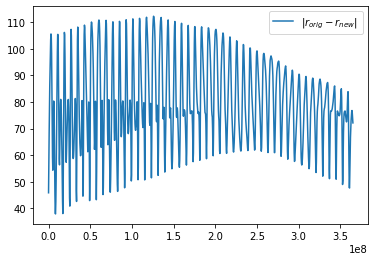

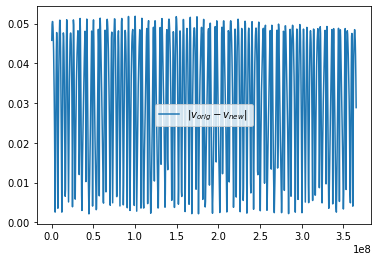

id000002  done
id000007  done
id000009  done
id000005  done
id000003  done


In [5]:
import pandas as pd
import numpy as np
import csv

for file in list_csv: 
    inew = 0 
    filename= file.rsplit('/')[-1].rsplit('.')[0].rsplit('-')[0]
    data = pd.read_csv(file, header = 0 )
    data['xh'] = np.nan
    data['yh'] = np.nan
    data['zh']=np.nan
    data['vxh'] = np.nan
    data['vyh'] = np.nan
    data['vz'] = np.nan
    for index, row in data.iterrows():
        convert(row)

    data.to_csv(module_directory + '/data/'+ filename+'-XV-new.csv', columns=[' t','xh','yh','zh','vxh', 'vyh', 'vz'], index = False)
    print(filename, " done") 
    file_orig = module_directory + '/data/'+ filename+ '-XV.csv'
    data_orig = pd.read_csv(file_orig, header = 0 )
    if filename == 'id000010':
        plot_panda_check(data_orig, data, filename)

In [3]:
def convert(row): 
    a = row['a']
    e = row['e']
    f = row['f']
    p = a*(e**2-1)
    r = p / (1+ e*np.cos(f))
    ang = row['varpi']-row['long']+f
    long = row['long']
    inc = row['inc']
    h = np.sqrt(4*np.pi**2 * (1-e**2))
    
    row['xh'] = r * ( np.cos(long)*np.cos(ang) - np.sin(long)*np.sin(ang)*np.cos(inc) )
    row['yh'] = r * ( np.sin(long)*np.cos(ang) + np.sin(ang)*np.sin(long)*np.cos(inc) )
    row['zh'] = r * np.sin(inc) * np.sin(ang)
    
    value = h * e / r / p
    row['vxh'] = row['xh'] * value * np.sin(f) - h * ( np.cos(long)*np.cos(ang) + np.sin(long)*np.cos(ang)*np.cos(inc) ) / r 
    row['vyh'] = row['yh'] * value * np.sin(f) - h * ( np.sin(long)*np.sin(ang) - np.cos(long)*np.cos(ang)*np.cos(inc) ) / r 
    row['vz'] = row['zh'] * value * np.sin(f) + h * ( np.cos(ang)*np.sin(inc))/ r 
    row['vxh'] = row['vxh'] / 365.25
    row['vyh'] = row['vxh'] / 365.25
    row['vzh'] = row['vxh'] / 365.25

In [4]:
import matplotlib.pyplot as plt 

def plot_panda_check(data_orig, data, filename): 
    fig, ax = plt.subplots()
    time = data[' t']
    dr = []
    dv = []
    for i in range(len(time)):
        rorig = [data_orig['xh'][i], data_orig['yh'][i], data_orig['zh'][i]] 
        vorig = [data_orig['vxh'][i], data_orig['vyh'][i], data_orig['vz'][i]] 
        r = [data['xh'][i], data['yh'][i], data['zh'][i]] 
        v = [data['vxh'][i], data['vyh'][i], data['vz'][i]]
        dr.append(np.linalg.norm(np.subtract(rorig, r)))
        dv.append(np.linalg.norm(np.subtract(vorig , v)))
    ax.plot(time, dr, label = '|$r_{orig} - r_{new}$| ') 
    plt.legend()
    plt.show()
    plt.close()
    
    fig, ax = plt.subplots()
    ax.plot(time, dv, label =  '$| v_{orig} - v_{new} |$ ') 
    plt.legend()
    plt.show()
    plt.close()
    